# Bank Churn modelling

# Linear Regression Case Study

1. **Domain Exploration**
     - understanding business process, the possible sources of data
     - Understand the business beleifs, losses
     

2. **Data Collection & Data Exploration**
    - collecting data from multiple sources and preparing a dataset out of it
    - exploring data to identify common issues with data
    
    
3. **Data Cleaning**
    - Handle duplicate entries
    - Handle unwanted columns
    - Handle missing values
    - Handle outliers
    
    
4. **Feature Engineering**
    - Feature Extraction
    - Feature Selection
        - Data Visualization
            - Univaraite Analysis
            - Bivariate Analysis
            - Multivariate Analysis

        - Statistical Research
            - Correlation Analysis
            - ANOVA
            - Chi Square test
            
5. **Preprocessing of features**
    - Feature Encoding
    - Feature Scaling
    - Train test split
    
6. **Applying Machine Learning**
    - pick the suitable ML algortihm and train the model
    
7. **Performance Analysis**
8. **OPtimization & TUning**
9. Deployment to production
10. Monitoring performance in production

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

## 2. Data Exploration

In [2]:
df = pd.read_csv(r"D:\AI\data\datasets-1\Bank_churn_modelling.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9985 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9990 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
print(df.Geography.unique())
print(df.Gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,9990.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.013721,76485.889288,1.530200,0.70550,0.515100,100127.441333,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892213,62397.405202,0.581654,0.45584,0.499797,57497.228065,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51112.885000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100238.110000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149400.922500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Observations**
    - RowNumber, CustomerId, Surname are unwanted columns
    - approximately more than 25% of customers have 0 balance in their bank account
    - Age may have slight outliers
    - Bank is operational from last 10 years
    - approx 49% of the customers are not active members.

## 3. Data Cleaning

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
# drop unwnted columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
# check for missing values
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure             15
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    10
Exited              0
dtype: int64

In [10]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010333
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001322
Exited             1.471611
dtype: float64

In [11]:
# df.Tenure.fillna(df.Tenure.mean(),inplace=True)

df.fillna(df.mean(),inplace=True)

In [12]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010341
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.001323
Exited             1.471611
dtype: float64

## 4. Feature Engineering 
#### Exploratory Data Analysis
### Data Visualization
#### Univariate Analysis
    - anlyse each of the variable individually
    - numeric - continous frequency distribution -  histogram
    - categorical - Discrete Frequency distribution - barplot

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender','HasCrCard', 'IsActiveMember','Exited']

In [ ]:
for col in nums:
    fig = px.histogram(df,x=col,width=900,height=350)
    fig.show()

In [ ]:
for col in cats:
    dfc = df[col].value_counts()
    fig = px.bar(x=dfc.index,y=dfc.values,width=900,height=350)
    fig.update_layout(title=col)
    fig.show()

**Observations**
    - approx 36% of customers have 0 balance in their account and rest balance b/w 75k to 150k
    - approx 95% of customesr have either 1 or 2 products
    - Salary and tenure has almost uniform distribution
    - approx 50% of the customers are from France
    - approx 49% of customers are not active members
    - approx 20% of customers left the bank

In [19]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [23]:
dfc.values

array([5014, 2509, 2477], dtype=int64)

#### Bivariate Analysis
    - numeric vs categorical - distplot
    - numeric vs numeric = scatterplot
    - categorical vs categorical - barplot

In [15]:
import seaborn as sns

In [14]:
## numeric vs cateogrical
nums = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cats = ['Geography', 'Gender','HasCrCard', 'IsActiveMember']

In [ ]:
for col in nums[:3]:
    not_exited_list = df[col][df.Exited==0]
    yes_exited_list = df[col][df.Exited==1]
    fig = ff.create_distplot([not_exited_list,yes_exited_list],['Exited=0','Exited=1'])
    fig.update_layout(title=col+" v/s Exited")
    fig.show()

In [33]:
for col in nums[3:]:
    not_exited_list = df[col][df.Exited==0]
    yes_exited_list = df[col][df.Exited==1]
    fig = ff.create_distplot([not_exited_list,yes_exited_list],['Exited=0','Exited=1'],bin_size=1)
    fig.update_layout(title=col+" v/s Exited")
    fig.show()

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



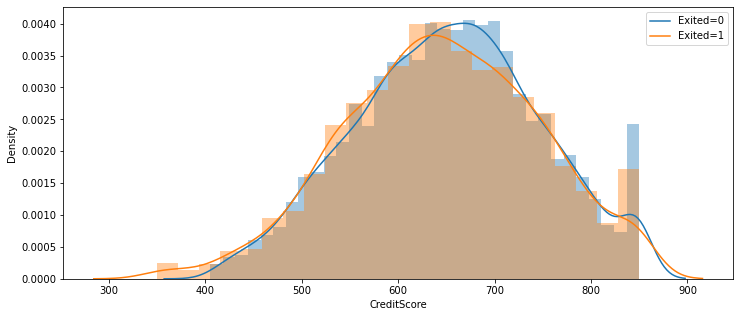

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



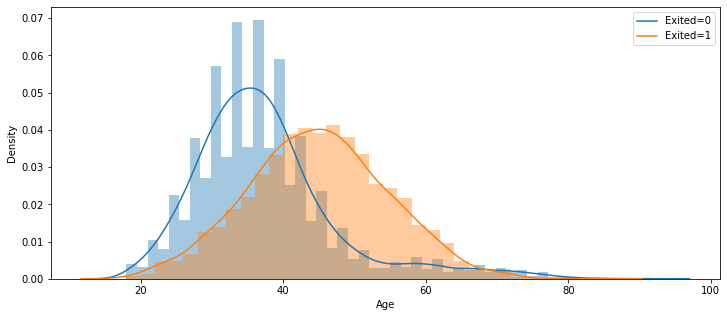

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



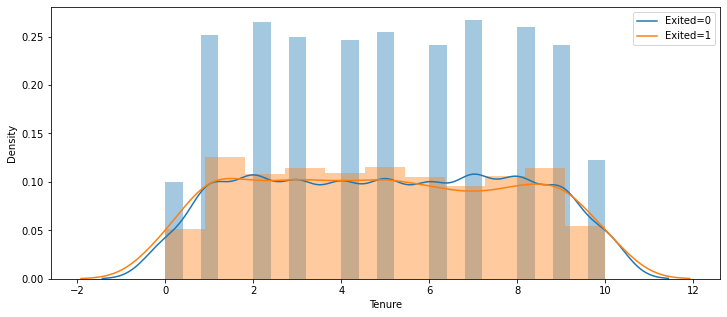

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



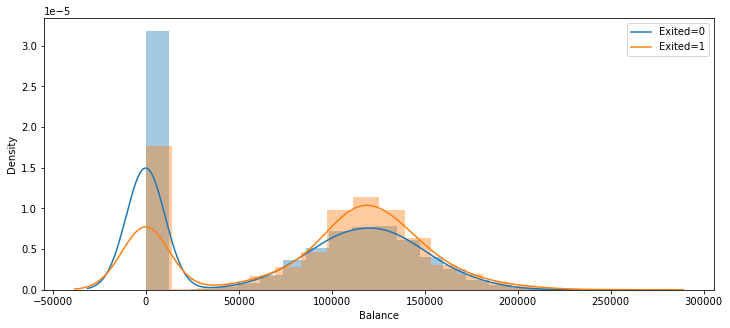

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



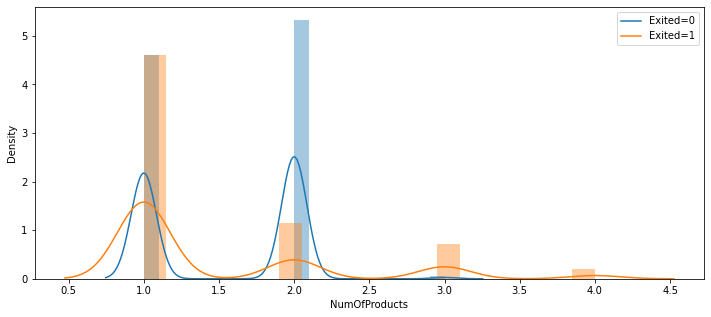

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



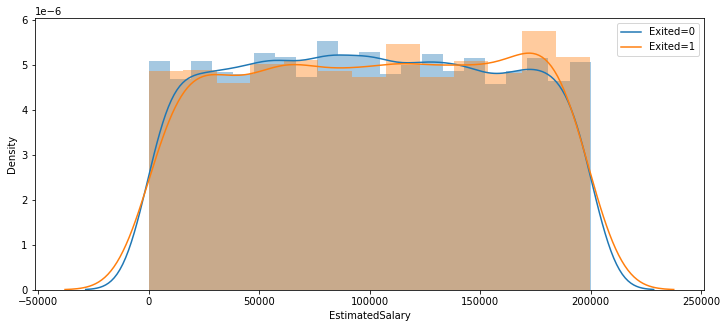

In [16]:
for col in nums:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['Exited=0','Exited=1'])
    plt.show()

In [17]:
# Categorical v.s categorical

for col in cats:
    print(col)
    pivot = pd.crosstab(df[col],df.Exited,margins=True)
    print(pivot)
    print(pivot[1]/pivot['All'],'\n\n')

Geography
Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64 


Gender
Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64 


HasCrCard
Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64 


IsActiveMember
Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
IsActiveMember
0      0.268509
1      0.142691
All    0.203700
dtype: flo

In [ ]:
# important features - Age, Balance, NUmber of products, geography, gender, isactivememeber

#### Multivariate Analysis

In [18]:
# numeric vs numeric vs categorical - scatterplot
# Age vs Balance vs Exited

In [ ]:
fig = px.scatter(df,x='Balance',y='Age',color='Exited')
fig.show()

In [ ]:
# categorical vs categorical vs numeric = stripplot
fig = px.strip(df,x='Geography',y='Age',color='Exited')
fig.show()

In [ ]:
# Customer profiling / journey mapping
fig = px.parallel_coordinates(df[['Age','NumOfProducts','Balance','Exited']].sample(1000,axis=0),color='Exited')
fig.show()

### Statistical Research

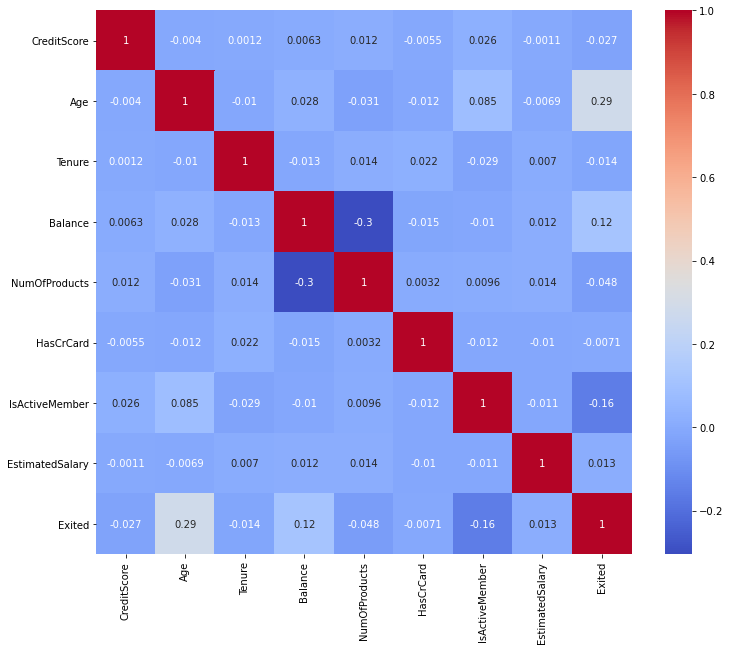

In [24]:
cor = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df['Exited']

## 5. Preprocessing of features

In [16]:
x.head(8)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1
5,645,Spain,Male,44,113755.78,2,0
6,822,France,Male,50,0.00,2,1
7,376,Germany,Female,29,115046.74,4,0


In [31]:
# as geography and gender are in string format, we can not feed this data as it is to an ML algorithm, so we will need to
# encode the features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
transformer = ColumnTransformer([('ohe',OneHotEncoder(drop='first'),[1,2]),
                                 ('sc',StandardScaler(),[0,3,4]) ],remainder='passthrough')
transformer.fit(x)

x2 = transformer.transform(x)

In [32]:
pd.DataFrame(x2).head(8)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,-0.326221,0.293517,-1.225848,1.0,1.0
1,0.0,1.0,0.0,-0.440036,0.198164,0.117350,1.0,1.0
2,0.0,0.0,0.0,-1.536794,0.293517,1.333053,3.0,0.0
3,0.0,0.0,0.0,0.501521,0.007457,-1.225848,2.0,0.0
4,0.0,1.0,0.0,2.063884,0.388871,0.785728,1.0,1.0
5,0.0,1.0,1.0,-0.057205,0.484225,0.597329,2.0,0.0
6,0.0,0.0,1.0,1.774174,1.056346,-1.225848,2.0,1.0
7,1.0,0.0,0.0,-2.840488,-0.946079,0.618019,4.0,0.0


In [33]:
# train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain, ytest = train_test_split(x2,y,test_size=0.2,random_state=5,stratify=y)
print(x2.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(10000, 8)
(8000, 8)
(2000, 8)
(10000,)
(8000,)
(2000,)


## 6. Apply ML technique - logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
# train the model using train set
model.fit(xtrain,ytrain)

LogisticRegression()

In [36]:
anycust = [[655,'France','Male',28,256555,2,1]]
anycust = transformer.transform(anycust)
model.predict(anycust)

array([0], dtype=int64)

## 7. Performance Analysis

In [37]:
# assess the performance of model using accuracy on test data
from sklearn import metrics
# get predictions for test data
ypred = model.predict(xtest)

In [38]:
print("Accuracy ",metrics.accuracy_score(ytest,ypred))

Accuracy  0.81


In [39]:
print("Accuracy ",metrics.accuracy_score(ytest,ypred))
print("Recall ",metrics.recall_score(ytest,ypred))
print("Precision ",metrics.precision_score(ytest,ypred))
print("F1 Score ",metrics.f1_score(ytest,ypred))

Accuracy  0.81
Recall  0.2113022113022113
Precision  0.593103448275862
F1 Score  0.3115942028985508


In [40]:
metrics.confusion_matrix(ytest,ypred)

array([[1534,   59],
       [ 321,   86]], dtype=int64)

## 6. Apply ML technique - KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)

In [45]:
# train the model using train set
model2.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [46]:
anycust = [[655,'France','Male',28,256555,2,1]]
anycust = transformer.transform(anycust)
model2.predict(anycust)

array([1], dtype=int64)

## 7. Performance Analysis

In [47]:
# assess the performance of model using accuracy on test data
from sklearn import metrics
# get predictions for test data
ypred = model2.predict(xtest)

In [48]:
print("Accuracy ",metrics.accuracy_score(ytest,ypred))

Accuracy  0.844


In [49]:
print("Accuracy ",metrics.accuracy_score(ytest,ypred))
print("Recall ",metrics.recall_score(ytest,ypred))
print("Precision ",metrics.precision_score(ytest,ypred))
print("F1 Score ",metrics.f1_score(ytest,ypred))

Accuracy  0.844
Recall  0.47911547911547914
Precision  0.6610169491525424
F1 Score  0.5555555555555557


In [50]:
metrics.confusion_matrix(ytest,ypred)

array([[1493,  100],
       [ 212,  195]], dtype=int64)